## Import the library

In [1]:
import pandas as pd
import numpy as np

Introduction to pandas Data Structures


*pandas* has two main data structures it uses, namely, *Series* and *DataFrames*.
pandas Series

pandas Series one-dimensional labeled array.

## Sample Heading

In [2]:
ser = pd.Series([100, 'foo', 300, 'bar', 500], ['tom', 'bob', 'nancy', 'dan', 'eric'])

In [3]:
ser

tom      100
bob      foo
nancy    300
dan      bar
eric     500
dtype: object

In [4]:
ser.index

Index(['tom', 'bob', 'nancy', 'dan', 'eric'], dtype='object')

In [5]:
ser.loc['bob']

'foo'

In [6]:
ser.loc[['nancy','bob']]

nancy    300
bob      foo
dtype: object

In [7]:
ser[[4, 3, 1]]

eric    500
dan     bar
bob     foo
dtype: object

In [8]:
ser.iloc[2]

300

In [ ]:
'bob' in ser

In [ ]:
ser * 2

In [ ]:
ser

In [ ]:
ser[[2,4]] ** 2

In [ ]:
ser[['nancy', 'eric']] ** 2

pandas DataFrame

pandas DataFrame is a 2-dimensional labeled data structure.

## Create DataFrame from dictionary of Python Series

In [ ]:
pd.Series([100., 200., 300.], index=['apple', 'ball', 'clock'])

In [ ]:

d = {'Column1' : pd.Series([100., 200., 300.], index=['apple', 'ball', 'clock']),
     'Column2' : pd.Series([111., 222., 333., 4444.], index=['apple', 'ball', 'cerill', 'dancy'])}

In [ ]:
df = pd.DataFrame(d)
df

In [ ]:
df.index

In [ ]:
df.columns

In [ ]:
pd.DataFrame(d, index=['dancy', 'ball', 'apple'])

## Create DataFrame from list of Python dictionaries

In [ ]:
data1 = ['abc','efg','xyz']

In [ ]:
pd.DataFrame(data1)

In [ ]:
data = [{'alex': 1, 'joe': 2}, {'ema': 5, 'dora': 10, 'alice': 20}]

In [ ]:
pd.DataFrame(data)

In [ ]:
pd.DataFrame(data, index=['orange', 'red'])

In [ ]:
pd.DataFrame(data, columns=['joe', 'dora','alice'])

Enough playing with data frames now we will look at basic data frame operations

In [ ]:
df

In [ ]:
df['Column1']

## Creating new columns

In [ ]:
df['Column3'] = df['Column1'] * df['Column2']
df

In [ ]:
df['flag'] = df['Column1'] > 250
df

In [ ]:
col3 = df.pop('Column3')

In [ ]:
col3

In [ ]:
df

In [ ]:
del df['Column2']

In [ ]:
df

## Use Pandas to Read the Dataset

In this notebook, we will be using three CSV files:

ratings.csv : userId,movieId,rating, timestamp
tags.csv : userId,movieId, tag, timestamp
movies.csv : movieId, title, genres 

Using the read_csv function in pandas, we will ingest these three files.

In [10]:
movies = pd.read_csv('movies.csv')
#print(type(movies))
movies.head(4)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance


In [11]:
movies.head(10)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [12]:
#Timestamps represent seconds since midnight Coordinated Universal Time (UTC) of January 1, 1970

tags = pd.read_csv('tags.csv')
tags.head()

,userId,movieId,tag,timestamp
0,18,4141,Mark Waters,1240597180
1,65,208,dark hero,1368150078
2,65,353,dark hero,1368150079
3,65,521,noir thriller,1368149983
4,65,592,dark hero,1368150078


In [13]:
ratings = pd.read_csv('ratings.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819
3,1,47,3.5,1112484727
4,1,50,3.5,1112484580


In [16]:
ratings.columns

Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')

In [15]:
ratings['rating'].head(4)

0    3.5
1    3.5
2    3.5
3    3.5
Name: rating, dtype: float64

In [18]:
#alternative
#dataframe.column
ratings.userId.head(5)

0    1
1    1
2    1
3    1
4    1
Name: userId, dtype: int64

In [19]:
ratings[['rating','userId']].tail(5)

,rating,userId
20000258,4.5,138493
20000259,4.5,138493
20000260,3.0,138493
20000261,5.0,138493
20000262,2.5,138493


In [20]:
#Checking the dimension of our dataframe

movies.shape

(27278, 3)

In [21]:

# For current analysis, we will remove timestamp (we will come back to it!)

del ratings['timestamp']
del tags['timestamp']

#tags.drop('userId', axis=1)

In [22]:
tags.tail(2)

,userId,movieId,tag
465562,138446,55999,sad
465563,138472,923,rise to power


In [23]:
ratings.head(3)

,userId,movieId,rating
0,1,2,3.5
1,1,29,3.5
2,1,32,3.5


## Checking the dimensions

In [24]:
movies.shape

(27278, 3)

In [25]:
ratings.shape

(20000263, 3)

In [26]:
tags.shape

(465564, 3)

In [27]:
tags.index

RangeIndex(start=0, stop=465564, step=1)

In [29]:
tags.columns

Index(['userId', 'movieId', 'tag'], dtype='object')

In [28]:
#Extract row 0, 11, 2000 from DataFrame

tags.iloc[[0,11,2000]]

,userId,movieId,tag
0,18,4141,Mark Waters
11,65,1783,noir thriller
2000,910,68554,conspiracy theory


In [30]:
#2000th row and 1st Column
tags.iloc[2000,2]

'conspiracy theory'

In [32]:
#Slicing the data frame

tags.iloc[:40, 0:2]


,userId,movieId
0,18,4141
1,65,208
2,65,353
3,65,521
4,65,592
5,65,668
6,65,898
7,65,1248
8,65,1391
9,65,1617


## Descriptive Statistics
Let's look how the ratings are distributed!

In [33]:
ratings.head()

,userId,movieId,rating
0,1,2,3.5
1,1,29,3.5
2,1,32,3.5
3,1,47,3.5
4,1,50,3.5


In [34]:
ratings.userId.describe()

count    2.000026e+07
mean     6.904587e+04
std      4.003863e+04
min      1.000000e+00
25%      3.439500e+04
50%      6.914100e+04
75%      1.036370e+05
max      1.384930e+05
Name: userId, dtype: float64

In [ ]:
ratings['rating'].describe()

In [35]:
ratings['rating'].mean()

3.5255285642993797

In [36]:
#mean of the entire data frame
ratings.mean()

userId     69045.872583
movieId     9041.567330
rating         3.525529
dtype: float64

In [37]:
#Min valune
#ratings['rating'].min()
ratings.rating.min()

0.5

In [38]:
ratings['rating'].max()

5.0

In [39]:
#Standard Deviation
ratings['rating'].std()

1.051988919275684

In [40]:
#Mode
ratings['rating'].mode()

0    4.0
dtype: float64

In [41]:

ratings.corr()

,userId,movieId,rating
userId,1.000000,-0.000850,0.001175
movieId,-0.000850,1.000000,0.002606
rating,0.001175,0.002606,1.000000


In [46]:
ratings.shape[0]

20000263

In [44]:
filter_1 = ratings['rating'] > 3
#print(filter_1)
filter_1.sum()


12195566

In [47]:
filter_2 = ratings['rating'] > 0
filter_2.all()

True

# Data Cleaning: Handling Missing Data

In [48]:
movies.shape

(27278, 3)

In [49]:
#is any row NULL ?

movies.isnull()

,movieId,title,genres
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
5,False,False,False
6,False,False,False
7,False,False,False
8,False,False,False
9,False,False,False


In [50]:
movies.isnull().any()

movieId    False
title      False
genres     False
dtype: bool

In [ ]:
tags.isnull()

In [53]:
tags.shape

(465564, 3)

In [51]:
tags.isnull().any()

userId     False
movieId    False
tag         True
dtype: bool

In [52]:
tags.tag.isnull().sum()

16

In [54]:
tags = tags.dropna()

# tags = tags.tag.fillna(tag.mean())  ----- Substituing NAN's

In [55]:
#Check again: is any row NULL ?

tags.isnull().any()

userId     False
movieId    False
tag        False
dtype: bool

In [56]:
tags.shape

(465548, 3)

# Data Visualization

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D4A23D0358>]],
      dtype=object)

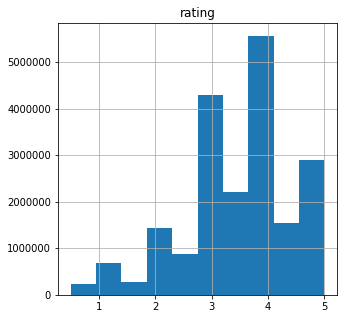

In [57]:
%matplotlib inline

ratings.hist(column='rating', figsize=(5,5))

In [58]:
ratings.rating.unique()

array([3.5, 4. , 3. , 4.5, 5. , 2. , 1. , 2.5, 0.5, 1.5])

In [59]:
ratings.rating.nunique()

10

In [60]:
import matplotlib.pyplot as plt 

(array([ 919857., 1710249., 5174591., 7762082., 4433484.]),
 array([0.5, 1.4, 2.3, 3.2, 4.1, 5. ]),
 <a list of 5 Patch objects>)

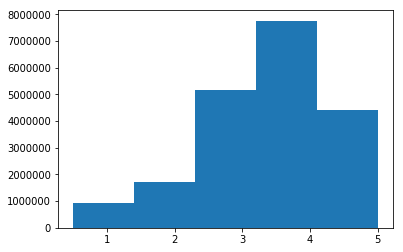

In [62]:
plt.hist(ratings['rating'], bins = 5)

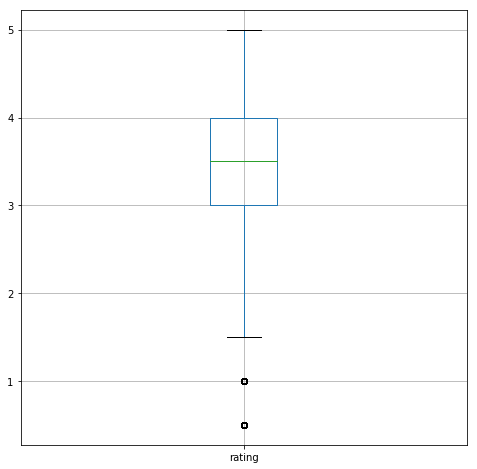

In [63]:
ratings.boxplot(column='rating', figsize=(8,8))

# Slicing Out Columns

In [64]:

tags['tag'].head()

0      Mark Waters
1        dark hero
2        dark hero
3    noir thriller
4        dark hero
Name: tag, dtype: object

In [65]:

movies[['title','genres']].head()

,title,genres
0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,Jumanji (1995),Adventure|Children|Fantasy
2,Grumpier Old Men (1995),Comedy|Romance
3,Waiting to Exhale (1995),Comedy|Drama|Romance
4,Father of the Bride Part II (1995),Comedy


In [66]:
ratings[-10:]

,userId,movieId,rating
20000253,138493,60816,4.5
20000254,138493,61160,4.0
20000255,138493,65682,4.5
20000256,138493,66762,4.5
20000257,138493,68319,4.5
20000258,138493,68954,4.5
20000259,138493,69526,4.5
20000260,138493,69644,3.0
20000261,138493,70286,5.0
20000262,138493,71619,2.5


In [67]:
ratings['rating'].value_counts()

4.0    5561926
3.0    4291193
5.0    2898660
3.5    2200156
4.5    1534824
2.0    1430997
2.5     883398
1.0     680732
1.5     279252
0.5     239125
Name: rating, dtype: int64

In [69]:
tags.tag.head(5)

0      Mark Waters
1        dark hero
2        dark hero
3    noir thriller
4        dark hero
Name: tag, dtype: object

In [68]:
tags['tag'].value_counts()

sci-fi                   3384
based on a book          3281
atmospheric              2917
comedy                   2779
action                   2657
surreal                  2427
BD-R                     2334
twist ending             2323
funny                    2072
dystopia                 1991
stylized                 1941
quirky                   1906
dark comedy              1899
classic                  1769
psychology               1754
fantasy                  1703
time travel              1549
romance                  1534
visually appealing       1509
disturbing               1487
aliens                   1428
thought-provoking        1422
social commentary        1417
Nudity (Topless)         1400
violence                 1336
drugs                    1312
Criterion                1286
true story               1276
nudity (topless)         1245
adventure                1243
                         ... 
keeps you guessing          1
gayish                      1
Terry Kinn

In [70]:
tag_counts = tags['tag'].value_counts()

In [71]:
tag_counts[:10]

sci-fi             3384
based on a book    3281
atmospheric        2917
comedy             2779
action             2657
surreal            2427
BD-R               2334
twist ending       2323
funny              2072
dystopia           1991
Name: tag, dtype: int64

In [72]:
import matplotlib.pyplot as plt

In [73]:
### Changing the size of your plot

plt.rcParams["figure.figsize"] = (12,8)

In [75]:
tag_counts[:10].index

Index(['sci-fi', 'based on a book', 'atmospheric', 'comedy', 'action',
       'surreal', 'BD-R', 'twist ending', 'funny', 'dystopia'],
      dtype='object')

In [76]:
tag_counts[:10].values

array([3384, 3281, 2917, 2779, 2657, 2427, 2334, 2323, 2072, 1991],
      dtype=int64)

<Container object of 10 artists>

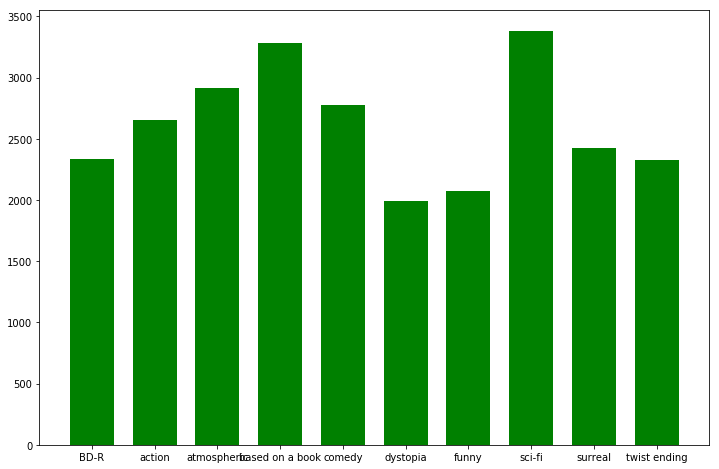

In [78]:
plt.bar(tag_counts[:10].index,tag_counts[:10].values, width = 0.7, color='g')

# Alternate way

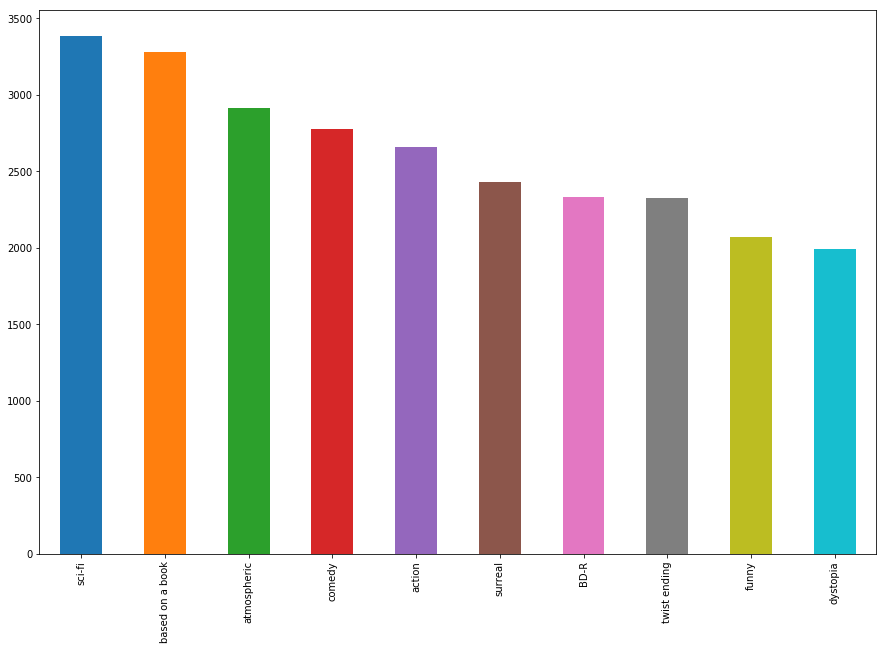

In [79]:
tag_counts[:10].plot(kind='bar', figsize=(15,10))

# Filters for Selecting Rows

In [ ]:
ratings.head(7)

In [80]:
ratings[ratings['rating'] > 4.5]

,userId,movieId,rating
131,1,4993,5.0
142,1,5952,5.0
158,1,7153,5.0
170,1,8507,5.0
176,2,62,5.0
177,2,70,5.0
180,2,260,5.0
181,2,266,5.0
183,2,480,5.0
184,2,541,5.0


In [81]:
movies.head(5)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [82]:
movies[movies.genres == 'Adventure|Animation|Children|Comedy|Fantasy']

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2209,2294,Antz (1998),Adventure|Animation|Children|Comedy|Fantasy
3027,3114,Toy Story 2 (1999),Adventure|Animation|Children|Comedy|Fantasy
3663,3754,"Adventures of Rocky and Bullwinkle, The (2000)",Adventure|Animation|Children|Comedy|Fantasy
3922,4016,"Emperor's New Groove, The (2000)",Adventure|Animation|Children|Comedy|Fantasy
4790,4886,"Monsters, Inc. (2001)",Adventure|Animation|Children|Comedy|Fantasy
10114,33463,DuckTales: The Movie - Treasure of the Lost La...,Adventure|Animation|Children|Comedy|Fantasy
10987,45074,"Wild, The (2006)",Adventure|Animation|Children|Comedy|Fantasy
11871,53121,Shrek the Third (2007),Adventure|Animation|Children|Comedy|Fantasy
13337,65577,"Tale of Despereaux, The (2008)",Adventure|Animation|Children|Comedy|Fantasy


In [83]:
movies[movies.genres == 'Animation']

,movieId,title,genres
2503,2588,Cloudland (1998),Animation
4906,5002,Fritz the Cat (1972),Animation
4907,5003,"Nine Lives of Fritz the Cat, The (1974)",Animation
9455,27738,"Cathedral, The (Katedra) (2002)",Animation
9989,32840,Vincent (1982),Animation
13444,66335,Afro Samurai: Resurrection (2009),Animation
13858,69469,Garfield's Pet Force (2009),Animation
14184,71158,Immigrants (L.A. Dolce Vita) (2008),Animation
14492,72603,Merry Madagascar (2009),Animation
14578,72927,Donkey Xote (2007),Animation


# Group By and Aggregate

In [ ]:
ratings.groupby('rating').count()

#Note - We saw value_counts() function earlier which was an alternative to groupby

In [ ]:
ratings.head(5)

In [ ]:
ratings.groupby('movieId').mean()#.head(10)

In [ ]:
ratings.groupby('movieId').count().head(10)

# Merge Dataframes

In [ ]:
tags.head(5)

In [ ]:
movies.head(5)

In [ ]:
tags.shape,movies.shape

In [ ]:
new_df = tags.merge(movies, on='movieId', how='inner')

In [ ]:
new_df.head(5)

In [ ]:
new_df.shape